# MNIST Original 데이터 불러오기

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
X_org,y_org=mnist["data"],mnist["target"]

#  MNIST Handmade 데이터 불러오기

In [2]:
import numpy as np
data=np.load('H_MNIST_train.npz')
X_handmade=data["img"]
y_handmade=data["label"]


# Original 데이터와 Handmade 데이터 합치기

In [3]:
X_org=X_org.reshape(-1,784)
X_handmade=X_handmade.reshape(-1,784)

In [4]:
y=np.concatenate((y_org,y_handmade),axis=0)
X=X.astype(np.int8)

In [5]:
y=np.concatenate((y_org,y_handmade),axis=0)
y=y.astype(np.int8)

# Train, Validation, Test set으로 나누기

In [6]:
from sklearn.model_selection import train_test_split
X_train0,X_test,y_train0,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train0,y_train0,train_size=0.7,random_state=42)
#X_train=X[:60000]
#y_train=y[:60000]
#X_val=X[60000:75000]
#y_val=y[60000:75000]
#X_test=X[75000:]
#y_test=y[75000:]

# RandomForest의 경우

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
rf_clf.fit(X_train,y_train)
rf_clf.predict(X_val)
rf_clf.score(X_val,y_val)

0.8813325674899483

In [8]:
rf_clf.score(X_test,y_test)

0.8826509511993383

In [9]:
def display_score(score):
    print("점수: ",score)
    print("평균: ",score.mean())
    print("표준편차: ",score.std())

In [10]:
from sklearn.model_selection import cross_val_score
rf_score=cross_val_score(rf_clf, X_train, y_train, cv=10, scoring="accuracy")
display_score(rf_score)

점수:  [0.8780768  0.87331802 0.88037414 0.8824881  0.87772854 0.87756442
 0.87657968 0.87493845 0.87986214 0.87904152]
평균:  0.8779971808804682
표준편차:  0.0025280916808775294


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train1,X_val1,y_train1,y_val1=train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, 80):
        model.fit(X_train1[:m], y_train1[:m])
        y_train_predict = model.predict(X_train1[:m])
        y_val_predict = model.predict(X_val1)
        train_errors.append(mean_squared_error(y_train1[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val1, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)  

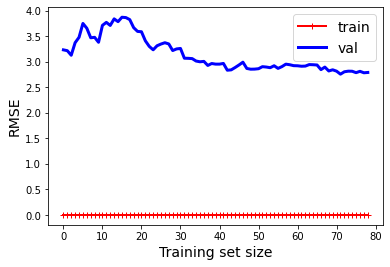

In [14]:
plot_learning_curves(rf_clf,X_train,y_train)

# Softmax Regression의 경우

In [15]:
from sklearn.linear_model import LogisticRegression
n_epoch = 500
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=10, 
                                max_iter=n_epoch, penalty='l2', C=1, tol=0.001)
softmax_reg.fit(X_train, y_train)
softmax_reg.predict(X_val)
softmax_reg.score(X_val, y_val)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7187440168485545

In [16]:
sm_score=cross_val_score(softmax_reg, X_train, y_train, cv=10, scoring="accuracy")
display_score(sm_score)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

점수:  [0.7085658  0.70561208 0.72120118 0.70244543 0.71541113 0.71770885
 0.70556376 0.70917446 0.72427376 0.71852946]
평균:  0.7128485905291092
표준편차:  0.007129265518567528


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# LinearSVC(이중분류기)를 OVR을 통해서 다중분류기로 

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
ovr1_clf=OneVsRestClassifier(LinearSVC(C=14,loss="hinge",random_state=42))#SVM으로 하나
ovr1_clf.fit(X_train,y_train)
ovr1_clf.score(X_val,y_val)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

0.31943327589507947

# SGD의 경우

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test,y_test)

0.6941687344913151

# RandomForest를 모델로 선정하였음

# RandomForest의 최적의 파라미터를 찾기 위한 GridSearch

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


Rd_tree = RandomForestClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[5,10,15,20], 'max_leaf_nodes' :[10,20,30,40] }


### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_Rd_tree = GridSearchCV(Rd_tree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_Rd_tree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_Rd_tree.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 10, 'max_leaf_nodes': 40}


In [20]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=10,max_leaf_nodes=40,n_jobs=-1)
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)

0.787172123300785

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


Rd_tree = RandomForestClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[None], 'max_leaf_nodes' :[60,80,100,None] }


### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_Rd_tree = GridSearchCV(Rd_tree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_Rd_tree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_Rd_tree.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': None, 'max_leaf_nodes': None}


In [23]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1)
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)

0.8820218265364733

In [24]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1,bootstrap=False)
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)

0.8907524411257898

In [25]:
rf_clf1=RandomForestClassifier(n_estimators=1500,n_jobs=-1)#최적의 파라미터 넣기
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)

0.882979130767758

In [28]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1,bootstrap=False,criterion='entropy')
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)

0.886923224200651

In [29]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1,bootstrap=False,criterion='gini')#최적의 파라미터 넣기
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)
#best

0.8909439019720468

In [30]:
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1,bootstrap=False,criterion='gini',warm_start=True)#최적의 파라미터 넣기
rf_clf1.fit(X_train,y_train)
rf_clf.predict(X_val)
rf_clf1.score(X_val,y_val)

0.8897568447252537

In [32]:
from time import time
time_started=time()
rf_clf1=RandomForestClassifier(n_estimators=1000,max_depth=None,max_leaf_nodes=None,n_jobs=-1,bootstrap=False,criterion='gini')
rf_clf1.fit(X_train,y_train)
rf_clf1.predict(X_val)
rf_clf1.score(X_val,y_val)
time_ended=time()
time_used=time_ended-time_started

In [33]:
print(time_used)

91.64159083366394


In [34]:
rf_clf1.score(X_test,y_test)

0.8910256410256411